In [7]:
#Dependencies 
import requests
import json
import pandas as pd
import numpy as np
import os
import csv
import matplotlib.pyplot as plt

#from config_edu import api_key

crimefile_path = "datasource/crime_data.csv"
crimefile_df = pd.read_csv(crimefile_path)

crimefile_df = crimefile_df.loc[crimefile_df["jurisdiction"] != "FEDERAL",:]
crimefile_df = crimefile_df.rename(index=str, columns={"jurisdiction": "State"})

election_2000_path = "datasource/Election Data 2000.csv"
election_2000 = pd.read_csv(election_2000_path)

election_2004_path = "datasource/Election Data 2004.csv"
election_2004 = pd.read_csv(election_2004_path)

election_2008_path = "datasource/Election Data 2008.csv"
election_2008 = pd.read_csv(election_2008_path)

election_2012_path = "datasource/Election Data 2012.csv"
election_2012 = pd.read_csv(election_2012_path)

election_2016_path = "datasource/Election Data 2016.csv"
election_2016 = pd.read_csv(election_2016_path)

election_2000 = election_2000.drop(columns=['EV', 'EV.1','G','B','N','Nader','Other','Nader.1','Other.1','Margin','%Margin'])
election_2000 = election_2000.rename(index=str, columns={"Gore": "Dem 2000", "Bush": "Rep 2000", "Gore.1": "Dem % 2000", "Bush.1": "Rep % 2000"})

election_2004 = election_2004.drop(columns=['EV', 'EV.1','B','K','Other','Other.1','Margin','%Margin'])
election_2004 = election_2004.rename(index=str, columns={"Kerry": "Dem 2004", "Bush": "Rep 2004", "Kerry.1": "Dem % 2004", "Bush.1": "Rep % 2004"})

election_2008.head()
election_2008 = election_2008.drop(columns=['EV', 'EV.1','O','M','Other','Other.1','Margin','%Margin'])
election_2008 = election_2008.rename(index=str, columns={"Obama": "Dem 2008", "McCain": "Rep 2008", "Obama.1": "Dem % 2008", "McCain.1": "Rep % 2008"})

election_2012 = election_2012.drop(columns=['EV', 'EV.1','O','R','Other','Other.1','Margin','%Margin'])
election_2012 = election_2012.rename(index=str, columns={"Obama": "Dem 2012", "Romney": "Rep 2012", "Obama.1": "Dem % 2012", "Romney.1": "Rep % 2012"})

election_2016 = election_2016.drop(columns=['EV', 'EV.1','EV.2','C','T','J','Johnson','Johnson.1','Other','Other.1','Margin','%Margin'])
election_2016 = election_2016.rename(index=str, columns={"Clinton":"Dem 2016", "Trump": "Rep 2016", "Clinton.1": "Dem % 2016", "Trump.1":"Rep % 2016"})

election_2000_2004 = pd.merge(election_2000, election_2004, on='State')
election_2000_2008 = pd.merge(election_2000_2004, election_2008, on='State')
election_2000_2012 = pd.merge(election_2000_2008, election_2012, on='State')
election_2000_2016 = pd.merge(election_2000_2012, election_2016, on='State')


# Still having issues with this, probably due to states being in all caps in the crime data
# crime_election_data = pd.merge(election_2000_2016, crimefile_df, how="left", on='State')
# crime_election_data

,State,Total Vote_x,Dem 2000,Rep 2000,Dem % 2000,Rep % 2000,Total Vote_y,Rep 2004,Dem 2004,Rep % 2004,...,violent_crime_total,murder_manslaughter,rape_legacy,rape_revised,robbery,agg_assault,property_crime_total,burglary,larceny,vehicle_theft
0,Alabama,"1,672,551",41.59%,56.47%,"695,602","944,409","1,883,449",62.46%,36.84%,"1,176,394",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alaska,"285,560",27.67%,58.62%,"79,004","167,398","312,598",61.07%,35.52%,"190,889",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arizona,"1,534,113",44.67%,50.95%,"685,341","781,652","2,016,102",54.77%,44.32%,"1,104,294",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arkansas,"921,781",45.86%,51.31%,"422,768","472,940","1,054,945",54.31%,44.55%,"572,898",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,California,"10,965,856",53.45%,41.65%,"5,861,203","4,567,429","12,421,859",44.36%,54.30%,"5,509,826",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Colorado,"1,741,365",42.39%,50.75%,"738,227","883,745","2,130,325",51.69%,47.02%,"1,101,256",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Connecticut,"1,459,525",55.91%,38.44%,"816,015","561,094","1,578,769",43.95%,54.31%,"693,826",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Delaware,"327,622",54.96%,41.90%,"180,068","137,288","375,270",45.74%,53.34%,"171,660",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,D. C.,"201,894",85.16%,8.95%,"171,923","18,073","227,586",9.34%,89.18%,"21,256",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Florida,"5,963,110",48.84%,48.85%,"2,912,253","2,912,790","7,609,810",52.10%,47.09%,"3,964,522",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


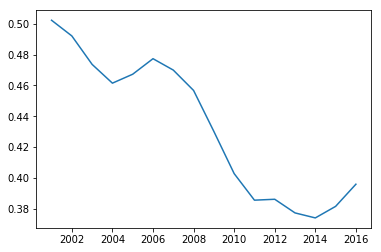

In [2]:
# Removing Federal Data as there are lot of NaN data.
crimefile_df = crimefile_df.loc[crimefile_df["jurisdiction"] != "FEDERAL",:]

year = crimefile_df["year"].unique()

year_pop_total = crimefile_df.groupby(["year"]).agg(
{
        "state_population":"sum"
    
})["state_population"]

year_crime_total = crimefile_df.groupby(["year"]).agg(
{
        "violent_crime_total":"sum"
})["violent_crime_total"]

crime_percent_year = (year_crime_total/year_pop_total)*100


crime_summary_df = pd.DataFrame({
     "Crime Percent": crime_percent_year
})

plt.plot(year, crime_percent_year)

In [3]:
# Take one state
df = crimefile_df.loc[crimefile_df[jurisdiction]=="ARIZONA",:]
df

NameError: name 'jurisdiction' is not defined